In [ ]:
# =============================
# 📦 STEP 1: Install Required Libraries
# =============================
!pip install -q pyautogen groq

In [ ]:
# =============================
# 🔑 STEP 2: Setup and Imports
# =============================
import os
import autogen
from groq import Groq
from autogen import AssistantAgent, UserProxyAgent
from autogen.coding import LocalCommandLineCodeExecutor
from IPython.display import display, Markdown, Image

In [ ]:
# =============================
# 🔐 STEP 3: Set Up GROQ API Key
# =============================
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')
client_groq = Groq(api_key=GROQ_API_KEY)

In [ ]:
os.environ["GROQ_API_KEY"] = GROQ_API_KEY
# userdata.set('GROQ_API_KEY', GROQ_API_KEY)

In [ ]:
# =============================
# 🧠 STEP 4: Define GROQ LLM Memory Chat Function
# =============================
SYSTEM_PROMPT = "You are a helpful AI assistant. Answer questions concisely and accurately."
message_history = [{"role": "system", "content": SYSTEM_PROMPT}]

def groq_chat_with_memory(question):
    message_history.append({"role": "user", "content": question})
    response = client_groq.chat.completions.create(
        model="llama-3-3-70b-versatile", # Change the model to 'llama-3-3-70b-versatile' or other supported Groq model
        messages=message_history
    )
    reply = response.choices[0].message.content
    message_history.append({"role": "assistant", "content": reply})
    return reply

In [ ]:
# =============================
# 🤖 STEP 5: AutoGen Assistant Agent Config
# =============================
config_list = [{
    "model": "llama-3.3-70b-versatile",
    "api_key": os.environ.get("GROQ_API_KEY"),
    "api_type": "groq"
}]

assistant = AssistantAgent(
    name="assistant",
    llm_config={
        "cache_seed": 42,
        "config_list": config_list,
        "temperature": 0.5,
    },
)

In [ ]:
# =============================
# 🧍 STEP 6: Create User Proxy Agent
# =============================
user_proxy = UserProxyAgent(
    name="user_proxy",
    human_input_mode="ALWAYS",
    max_consecutive_auto_reply=3,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={"executor": LocalCommandLineCodeExecutor(work_dir="groq_coding")},
)

In [ ]:
# 💬 Start asking questions interactively
user_proxy.initiate_chat(
    assistant,
    message="Hey, what can you do for me today?",
    summary_method="last_msg",
)

user_proxy (to assistant):

Hey, what can you do for me today?

--------------------------------------------------------------------------------
assistant (to user_proxy):

I can assist you with a wide range of tasks, from collecting information to performing specific actions using code. To better understand what I can do for you, I'll need to know more about your needs. 

Let's start by checking the operating system you're using. This will give me an idea of the tools and scripts I can suggest to you. 

```python
# filename: check_os.py
import sys
print("Operating System: ", sys.platform)
```

Please execute this code and I'll proceed based on the result.

--------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/autogen/oai/groq.py:303: UserWarning: Cost calculation not available for model llama-3.3-70b-versatile
  warnings.warn(f"Cost calculation not available for model {model}", UserWarning)


Replying as user_proxy. Provide feedback to assistant. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: What is Sonet
user_proxy (to assistant):

What is Sonet

--------------------------------------------------------------------------------
assistant (to user_proxy):

A sonnet is a type of poem that originated in Italy in the 13th century. It is a 14-line poem, typically written in iambic pentameter, with a specific rhyme scheme. There are two main forms of sonnets: the Shakespearean sonnet and the Italian sonnet.

To provide more information about sonnets, I'd like to print out a brief example of a sonnet and its characteristics. 

```python
# filename: sonnet_info.py
print("A sonnet is a 14-line poem with a specific rhyme scheme.")
print("There are two main forms of sonnets: the Shakespearean sonnet and the Italian sonnet.")
print("Shakespearean sonnet:")
print("  - Consists of 14 lines, with a rhyme scheme of ABAB CDCD EFEF GG")
print("Italian sonnet:

ChatResult(chat_id=None, chat_history=[{'content': 'Hey, what can you do for me today?', 'role': 'assistant', 'name': 'user_proxy'}, {'content': 'I can assist you with a wide range of tasks, from collecting information to performing specific actions using code. To better understand what I can do for you, I\'ll need to know more about your needs. \n\nLet\'s start by checking the operating system you\'re using. This will give me an idea of the tools and scripts I can suggest to you. \n\n```python\n# filename: check_os.py\nimport sys\nprint("Operating System: ", sys.platform)\n```\n\nPlease execute this code and I\'ll proceed based on the result.', 'role': 'user', 'name': 'assistant'}, {'content': 'What is Sonet', 'role': 'assistant', 'name': 'user_proxy'}, {'content': 'A sonnet is a type of poem that originated in Italy in the 13th century. It is a 14-line poem, typically written in iambic pentameter, with a specific rhyme scheme. There are two main forms of sonnets: the Shakespearean so

In [ ]:
# =============================
# 🚦 STEP 7: Start Agentic Chat
# =============================
def interactive_chat():
    display(Markdown("### ✅ Chat initialized. Type 'exit' to stop."))
    while True:
        user_input = input("You: ")
        if user_input.lower() in ["exit", "quit"]:
            print("Agent: Goodbye!")
            break

        # Forward to GROQ-powered AssistantAgent
        chat_result = user_proxy.initiate_chat(
            recipient=assistant,
            message=user_input,
            summary_method="reflection_with_llm",
        )

        # Extract AssistantAgent reply
        print("Agent:", chat_result.summary)

In [ ]:
# =============================
# 🌐 STEP 8: Visualize the Agentic Graph Flow
# =============================
import graphviz

def draw_agentic_flow():
    dot = graphviz.Digraph(comment='AutoGen-GROQ Chatbot Graph', format='png')
    dot.attr(rankdir='LR')
    dot.node('U', 'User', shape='box', style='filled', color='lightblue')
    dot.node('UP', 'UserProxyAgent', shape='ellipse', style='filled', color='lightgreen')
    dot.node('A', 'AssistantAgent', shape='ellipse', style='filled', color='orange')
    dot.node('G', 'GROQ API (LLM)', shape='parallelogram', style='filled', color='lightgrey')
    dot.node('M', 'Message Memory', shape='folder', style='filled', color='yellow')

    dot.edge('U', 'UP', label='sends question')
    dot.edge('UP', 'A', label='forwards')
    dot.edge('A', 'G', label='calls')
    dot.edge('G', 'A', label='responds')
    dot.edge('A', 'M', label='stores reply')
    dot.edge('A', 'UP', label='returns answer')
    dot.edge('UP', 'U', label='displays answer')

    dot.render('/mnt/data/autogen_groq_graph', format='png', cleanup=True)
    display(Image('/mnt/data/autogen_groq_graph.png'))

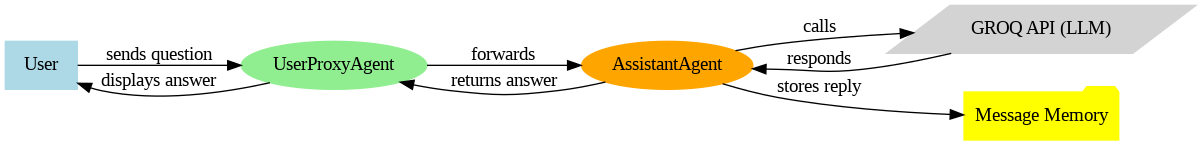

### ✅ Chat initialized. Type 'exit' to stop.

You: exit
Agent: Goodbye!


In [ ]:
# =============================
# ▶️ STEP 9: Run Visual Flow and Chat
# =============================
draw_agentic_flow()
interactive_chat()